In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal

In [2]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

## Data import
We import the csv file.
We are interested in the  Ping_index , Ping_date , Ping_time , Latitude,  Longitude , and the sv* columns.
Each sv* column corresponds to a depth.
The value for each cell is the logarithm of the intensity of the echo.(ratio of intensity)

In [3]:
data_path = '/home/benjamin/Documents/datascience/ACE/test/'
data_path = '/home/benjamin/Documents/datascience/ACE/'

### Filtering

In [41]:
%%time
import glob
global_swarm_list = []
list_of_errors = []
list_of_dates = []
for filename in glob.iglob(data_path+'*.csv'):
    print('Loading data ...')
    print('%s' % filename)
    try:
        info_df,echogram,depth_data = ACE_box.extract_data(filename,150)
        print('Start date:',info_df.Ping_date[0],info_df.Ping_time[0])
        print('End date:',info_df.Ping_date[len(info_df.Ping_time)-1],info_df.Ping_time[len(info_df.Ping_time)-1])
        list_of_dates.append((info_df.Ping_date[0],info_df.Ping_time[0],
                             info_df.Ping_date[len(info_df.Ping_time)-1],info_df.Ping_time[len(info_df.Ping_time)-1]
                            ))
        print('Latitude',info_df.Latitude[5])
        print('------------------------')
        print('Filtering data...')
        denoised = ACE_box.filter_data(echogram)
        print('Finding krill swarms...')
        krillsignal,energy_fluctuation = ACE_box.krill_function(denoised,1)
        print('Energy fluctuation:',energy_fluctuation)
        swarm_echo_list = ACE_box.extract_krillchunks(krillsignal,denoised)
        print("Nb of swarms found: ",len(swarm_echo_list))
        print('Extracting swarm information...')
        swarm_list = ACE_box.info_from_swarm_list(swarm_echo_list,echogram,info_df,depth_data,filename)
        print('Done.')
        print('+++++++++++++')
        global_swarm_list += swarm_list
    except:
        print("""
            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            ERROR: Could not process file {}
            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            """.format(filename))
        list_of_errors.append(filename)
        continue
            

Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170217-T230012.sv.csv
------------------------------
Data matrix size: (2688, 9249)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-17 23:00:12
End date: 2017-02-18 02:00:13
Latitude -64.13891113
------------------------
Filtering data...
Number of noisy pixels removed:  1983552.0
Finding krill swarms...
Energy fluctuation: 8.34800721198
Nb of swarms found:  71
Extracting swarm information...
Number of noisy pixels removed:  1613957.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170212-T103929.sv.csv
------------------------------
Data matrix size: (2690, 5037)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.3016973
Nb of pixels along depth axis: 2690
Depth 

Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-12 00:09:23
End date: 2017-02-12 03:37:16
Latitude -73.20109037
------------------------
Filtering data...
Number of noisy pixels removed:  1990061.0
Finding krill swarms...
Energy fluctuation: 5.74685908051
Nb of swarms found:  242
Extracting swarm information...
Number of noisy pixels removed:  1246865.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170215-T163906.sv.csv
------------------------------
Data matrix size: (2688, 3947)
Start depth (in meters): 0.0929792
Stop depth (in meters): 499.9491571
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185958399516
Echogram truncated to the first 150 meters (760 pixels).
-----------------------------
Start date: 2017-02-15 16:39:06
End date: 2017-02-15 17:54:53
Latitude -68.58111773
------------------------
Filtering data...
Number of noisy pixels removed:  893300.0
Finding 

------------------------------
Data matrix size: (2688, 9233)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-17 11:07:18
End date: 2017-02-17 14:07:02
Latitude -65.50148213
------------------------
Filtering data...
Number of noisy pixels removed:  1958798.0
Finding krill swarms...
Energy fluctuation: 1.38243057539
Nb of swarms found:  479
Extracting swarm information...
Number of noisy pixels removed:  1756008.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170209-T121539.sv.csv
------------------------------
Data matrix size: (2693, 9145)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547
Echogram truncated to the first 150 meters (762 p

Finding krill swarms...
Energy fluctuation: 7.85403143975
Nb of swarms found:  17
Extracting swarm information...
Number of noisy pixels removed:  728332.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170215-T134447.sv.csv
------------------------------
Data matrix size: (2688, 9245)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-15 13:44:47
End date: 2017-02-15 16:39:05
Latitude -68.62814194
------------------------
Filtering data...
Number of noisy pixels removed:  1984598.0
Finding krill swarms...
Energy fluctuation: 1.67918708715
Nb of swarms found:  224
Extracting swarm information...
Number of noisy pixels removed:  1698808.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170207-T222914.sv.csv

Number of noisy pixels removed:  1025843.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170216-T035655.sv.csv
------------------------------
Data matrix size: (2688, 9245)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-16 03:56:55
End date: 2017-02-16 06:51:02
Latitude -68.48703244
------------------------
Filtering data...
Number of noisy pixels removed:  1982813.0
Finding krill swarms...
Energy fluctuation: 2.2881409633
Nb of swarms found:  244
Extracting swarm information...
Number of noisy pixels removed:  1713639.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170215-T175504.sv.csv
------------------------------
Data matrix size: (2688, 9223)
Start depth (in meters): 0.0929792
Stop depth (in m

Number of noisy pixels removed:  1714772.0
Finding krill swarms...
Energy fluctuation: 1.6680535224
Nb of swarms found:  354
Extracting swarm information...
Number of noisy pixels removed:  1591762.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170208-T050510.sv.csv
------------------------------
Data matrix size: (2693, 9168)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-08 05:05:10
End date: 2017-02-08 08:34:06
Latitude -69.64332449
------------------------
Filtering data...
Number of noisy pixels removed:  1936706.0
Finding krill swarms...
Energy fluctuation: 5.94848884516
Nb of swarms found:  24
Extracting swarm information...
Number of noisy pixels removed:  1554447.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/da

Number of noisy pixels removed:  1530631.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170218-T020014.sv.csv
------------------------------
Data matrix size: (2688, 9250)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-18 02:00:14
End date: 2017-02-18 05:00:14
Latitude -63.96419373
------------------------
Filtering data...
Number of noisy pixels removed:  2025176.0
Finding krill swarms...
Energy fluctuation: 8.26583720428
Nb of swarms found:  18
Extracting swarm information...
Number of noisy pixels removed:  1742700.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170209-T154602.sv.csv
------------------------------
Data matrix size: (2693, 9146)
Start depth (in meters): 0.09278976
Stop depth (in 

------------------------------
Data matrix size: (2688, 9174)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-19 12:40:18
End date: 2017-02-19 16:05:28
Latitude -57.57739691
------------------------
Filtering data...
Number of noisy pixels removed:  1856047.0
Finding krill swarms...
Energy fluctuation: 1.61820494816
Nb of swarms found:  706
Extracting swarm information...
Number of noisy pixels removed:  1606895.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170207-T210420.sv.csv
------------------------------
Data matrix size: (2693, 3729)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547
Echogram truncated to the first 150 meters (762 p

Start depth (in meters): 0.0  2852.395  2017-02-18  05:00:15  980.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  69.168179  69.262251  69.473912  63.606179  -10.169688  -27.796405  -28.384354  -33.242439  -35.734061  -40.862407  -53.335799  -59.708349  -51.551776  -59.812275  -64.052935  -57.903165  -64.309384  -61.923296  -64.415905  -59.989061  -61.80957  -66.441052  -65.555794  -64.796086  -71.968138  -66.797933  -66.099476  -66.567308  -65.013694  -68.128561  -67.809131  -67.429482  -65.08398  -67.827402  -70.908562  -69.423457  -89.264907  -72.848743  -71.067461  -68.53995  -74.7789  -86.467972  -77.207964  -76.595979  -82.997274  -79.020084  -91.733381  -71.855064  -73.123506  -80.228337  -81.339857  -83.583858  -72.461369  -75.417725  -76.531132  -76.307108  -70.970905  -77.255451  -85.247819  -78.414782  -71.831266  -76.221378  -72.805937  -77.189038  -82.620948  -74.297035  -71.948807  -71.04899  -71.738631  -71.630595  -78.262336  -79.47501  -75.480227  -86.0330

Stop depth (in meters): 0.0  2852.395  2017-02-18  05:00:15  980.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  69.168179  69.262251  69.473912  63.606179  -10.169688  -27.796405  -28.384354  -33.242439  -35.734061  -40.862407  -53.335799  -59.708349  -51.551776  -59.812275  -64.052935  -57.903165  -64.309384  -61.923296  -64.415905  -59.989061  -61.80957  -66.441052  -65.555794  -64.796086  -71.968138  -66.797933  -66.099476  -66.567308  -65.013694  -68.128561  -67.809131  -67.429482  -65.08398  -67.827402  -70.908562  -69.423457  -89.264907  -72.848743  -71.067461  -68.53995  -74.7789  -86.467972  -77.207964  -76.595979  -82.997274  -79.020084  -91.733381  -71.855064  -73.123506  -80.228337  -81.339857  -83.583858  -72.461369  -75.417725  -76.531132  -76.307108  -70.970905  -77.255451  -85.247819  -78.414782  -71.831266  -76.221378  -72.805937  -77.189038  -82.620948  -74.297035  -71.948807  -71.04899  -71.738631  -71.630595  -78.262336  -79.47501  -75.480227  -86.03303

Nb of pixels along depth axis: 0.0  2852.395  2017-02-18  05:00:15  980.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  69.168179  69.262251  69.473912  63.606179  -10.169688  -27.796405  -28.384354  -33.242439  -35.734061  -40.862407  -53.335799  -59.708349  -51.551776  -59.812275  -64.052935  -57.903165  -64.309384  -61.923296  -64.415905  -59.989061  -61.80957  -66.441052  -65.555794  -64.796086  -71.968138  -66.797933  -66.099476  -66.567308  -65.013694  -68.128561  -67.809131  -67.429482  -65.08398  -67.827402  -70.908562  -69.423457  -89.264907  -72.848743  -71.067461  -68.53995  -74.7789  -86.467972  -77.207964  -76.595979  -82.997274  -79.020084  -91.733381  -71.855064  -73.123506  -80.228337  -81.339857  -83.583858  -72.461369  -75.417725  -76.531132  -76.307108  -70.970905  -77.255451  -85.247819  -78.414782  -71.831266  -76.221378  -72.805937  -77.189038  -82.620948  -74.297035  -71.948807  -71.04899  -71.738631  -71.630595  -78.262336  -79.47501  -75.480227  -8

Depth per pixel (in meters): 0.0  2852.395  2017-02-18  05:00:15  980.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  69.168179  69.262251  69.473912  63.606179  -10.169688  -27.796405  -28.384354  -33.242439  -35.734061  -40.862407  -53.335799  -59.708349  -51.551776  -59.812275  -64.052935  -57.903165  -64.309384  -61.923296  -64.415905  -59.989061  -61.80957  -66.441052  -65.555794  -64.796086  -71.968138  -66.797933  -66.099476  -66.567308  -65.013694  -68.128561  -67.809131  -67.429482  -65.08398  -67.827402  -70.908562  -69.423457  -89.264907  -72.848743  -71.067461  -68.53995  -74.7789  -86.467972  -77.207964  -76.595979  -82.997274  -79.020084  -91.733381  -71.855064  -73.123506  -80.228337  -81.339857  -83.583858  -72.461369  -75.417725  -76.531132  -76.307108  -70.970905  -77.255451  -85.247819  -78.414782  -71.831266  -76.221378  -72.805937  -77.189038  -82.620948  -74.297035  -71.948807  -71.04899  -71.738631  -71.630595  -78.262336  -79.47501  -75.480227  -86.


            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            ERROR: Could not process file /home/benjamin/Documents/datascience/ACE/ACE_-D20170218-T050015.sv.csv
            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170220-T000950.sv.csv
------------------------------
Data matrix size: (2688, 9402)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-20 00:09:50
End date: 2017-02-20 01:59:39
Latitude -55.26191942
------------------------
Filtering data...
Number of noisy pixels removed:  15888.0
Finding krill swarms...
Energy fluctuation: 41.6860982911
Nb of swarms found:  1
Extracting swarm information...
Number of noisy pixels removed:  15888.0
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascie

Stop depth (in meters): 0.0  3436.848  2017-02-20  03:49:30  851.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  68.756614  68.838927  69.027071  63.194615  -10.36959  -30.771428  -56.288424  -34.665276  -38.274001  -43.296517  -47.820836  -53.334979  -56.267129  -53.685844  -55.927477  -54.704722  -66.955156  -59.783161  -68.602103  -62.999361  -59.857578  -62.454756  -65.932082  -61.785786  -76.271926  -78.098317  -65.229311  -60.970032  -65.836823  -70.856645  -65.727791  -62.584781  -65.025185  -66.204662  -76.341213  -84.345608  -73.872397  -77.893347  -71.949384  -66.787861  -65.030702  -77.860395  -72.527889  -71.527857  -68.239748  -67.896085  -74.988587  -73.63067  -79.978994  -78.440972  -71.227131  -73.153639  -66.193831  -72.078173  -84.950565  -72.403125  -87.104232  -74.621438  -72.73626  -73.393695  -78.357502  -77.185614  -81.601657  -70.639283  -66.746319  -70.581196  -72.454443  -72.119058  -73.090914  -75.840311  -71.653787  -74.818452  -71.929014  -77.3

Nb of pixels along depth axis: 0.0  3436.848  2017-02-20  03:49:30  851.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  68.756614  68.838927  69.027071  63.194615  -10.36959  -30.771428  -56.288424  -34.665276  -38.274001  -43.296517  -47.820836  -53.334979  -56.267129  -53.685844  -55.927477  -54.704722  -66.955156  -59.783161  -68.602103  -62.999361  -59.857578  -62.454756  -65.932082  -61.785786  -76.271926  -78.098317  -65.229311  -60.970032  -65.836823  -70.856645  -65.727791  -62.584781  -65.025185  -66.204662  -76.341213  -84.345608  -73.872397  -77.893347  -71.949384  -66.787861  -65.030702  -77.860395  -72.527889  -71.527857  -68.239748  -67.896085  -74.988587  -73.63067  -79.978994  -78.440972  -71.227131  -73.153639  -66.193831  -72.078173  -84.950565  -72.403125  -87.104232  -74.621438  -72.73626  -73.393695  -78.357502  -77.185614  -81.601657  -70.639283  -66.746319  -70.581196  -72.454443  -72.119058  -73.090914  -75.840311  -71.653787  -74.818452  -71.929014

Depth per pixel (in meters): 0.0  3436.848  2017-02-20  03:49:30  851.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  68.756614  68.838927  69.027071  63.194615  -10.36959  -30.771428  -56.288424  -34.665276  -38.274001  -43.296517  -47.820836  -53.334979  -56.267129  -53.685844  -55.927477  -54.704722  -66.955156  -59.783161  -68.602103  -62.999361  -59.857578  -62.454756  -65.932082  -61.785786  -76.271926  -78.098317  -65.229311  -60.970032  -65.836823  -70.856645  -65.727791  -62.584781  -65.025185  -66.204662  -76.341213  -84.345608  -73.872397  -77.893347  -71.949384  -66.787861  -65.030702  -77.860395  -72.527889  -71.527857  -68.239748  -67.896085  -74.988587  -73.63067  -79.978994  -78.440972  -71.227131  -73.153639  -66.193831  -72.078173  -84.950565  -72.403125  -87.104232  -74.621438  -72.73626  -73.393695  -78.357502  -77.185614  -81.601657  -70.639283  -66.746319  -70.581196  -72.454443  -72.119058  -73.090914  -75.840311  -71.653787  -74.818452  -71.929014  


            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            ERROR: Could not process file /home/benjamin/Documents/datascience/ACE/ACE_-D20170220-T053918.sv.csv
            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170218-T080059.sv.csv
------------------------------
Data matrix size: (2688, 9247)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
-----------------------------
Start date: 2017-02-18 08:00:59
End date: 2017-02-18 11:01:40
Latitude -62.8915845
------------------------
Filtering data...
Number of noisy pixels removed:  1806074.0
Finding krill swarms...
Energy fluctuation: 8.23491895737
Nb of swarms found:  96
Extracting swarm information...
Number of noisy pixels removed:  1554207.0
Done.
+++++++++++++
CPU times: user 10min 17s, sys: 45.4 s, total:

In [42]:
global_swarm_list_full = global_swarm_list.copy()
len(global_swarm_list)

26907

In [43]:
list_of_errors

['/home/benjamin/Documents/datascience/ACE/ACE_-D20170218-T050015.sv.csv',
 '/home/benjamin/Documents/datascience/ACE/ACE_-D20170220-T053918.sv.csv']

In [44]:
list_of_dates

[('2017-02-17', '23:00:12', '2017-02-18', '02:00:13'),
 ('2017-02-12', '10:39:29', '2017-02-12', '12:34:49'),
 ('2017-02-17', '14:07:03', '2017-02-17', '17:06:47'),
 ('2017-02-14', '16:53:00', '2017-02-14', '20:23:08'),
 ('2017-02-12', '03:37:17', '2017-02-12', '07:07:59'),
 ('2017-02-19', '22:19:58', '2017-02-20', '00:09:49'),
 ('2017-02-08', '01:35:39', '2017-02-08', '05:05:09'),
 ('2017-02-19', '02:51:27', '2017-02-19', '06:07:18'),
 ('2017-02-14', '20:23:10', '2017-02-14', '23:52:07'),
 ('2017-02-17', '17:06:49', '2017-02-17', '20:03:11'),
 ('2017-02-14', '02:54:44', '2017-02-14', '06:24:46'),
 ('2017-02-12', '00:09:23', '2017-02-12', '03:37:16'),
 ('2017-02-15', '16:39:06', '2017-02-15', '17:54:53'),
 ('2017-02-09', '05:15:04', '2017-02-09', '08:44:48'),
 ('2017-02-15', '03:18:27', '2017-02-15', '03:43:55'),
 ('2017-02-20', '16:26:20', '2017-02-20', '18:51:37'),
 ('2017-02-18', '14:04:46', '2017-02-18', '17:11:56'),
 ('2017-02-15', '07:27:08', '2017-02-15', '07:43:19'),
 ('2017-02

In [13]:
global_swarm_list = [swarm for swarm in global_swarm_list if swarm['length']>0 and swarm['height']>0
                     and swarm['depth']< 140#80
                    and 10*np.log10(swarm['biomass_per_pixel']/10)<-55
                    and 10*np.log10(swarm['biomass_per_pixel']/10)>-90
                    and swarm['longitude']!=0
                    and swarm['boat speed']>7
                    and swarm['length']<1000]
len(global_swarm_list)

3581

<IPython.core.display.Javascript object>


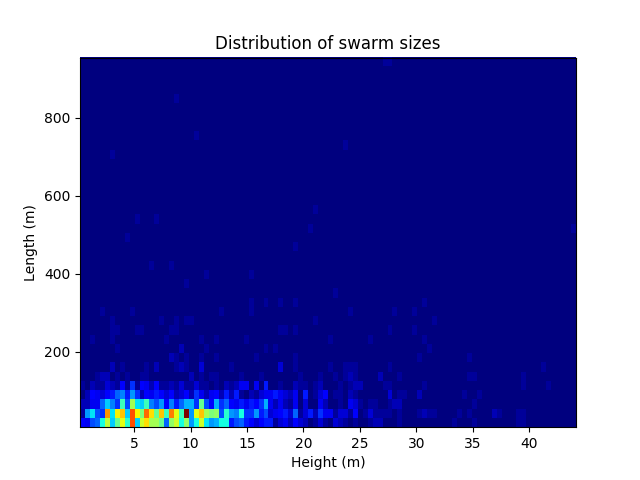

Text(0.5,1,'Distribution of swarm sizes')

In [14]:
%matplotlib notebook
H,L = [],[]
for swarm in global_swarm_list:
    if swarm['length']>0 and swarm['height']>0 and swarm['depth']<80:
        H.append(swarm['height'])
        L.append(swarm['length'])
plt.figure()
if len(global_swarm_list)<300:
    plt.scatter(H,L)
else:
    plt.hist2d(H, L, bins=(100, 40), cmap=plt.cm.jet)
plt.xlabel('Height (m)')
plt.ylabel('Length (m)')
plt.title('Distribution of swarm sizes')

<IPython.core.display.Javascript object>


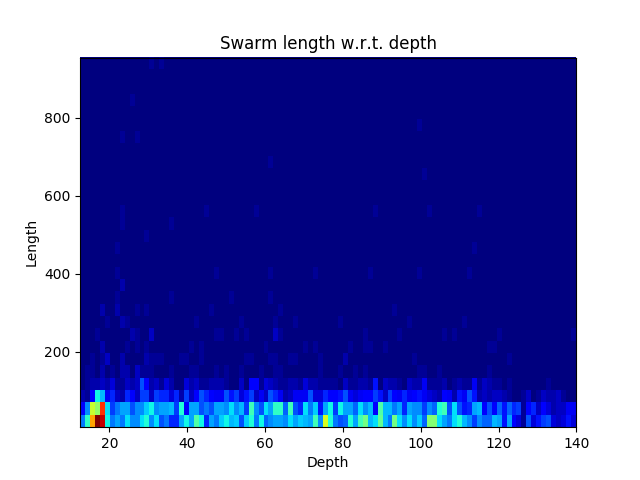

Text(0.5,1,'Swarm length w.r.t. depth')

In [16]:
D,L = [],[]
for swarm in global_swarm_list:
    if swarm['length']>0 and swarm['height']>0 and swarm['depth']<140:
        D.append(swarm['depth'])
        L.append(swarm['length'])
plt.figure()
if len(global_swarm_list)<200:
    plt.scatter(D,L)
else:
    plt.hist2d(D, L, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Depth')
plt.ylabel('Length')
plt.title('Swarm length w.r.t. depth')

<IPython.core.display.Javascript object>


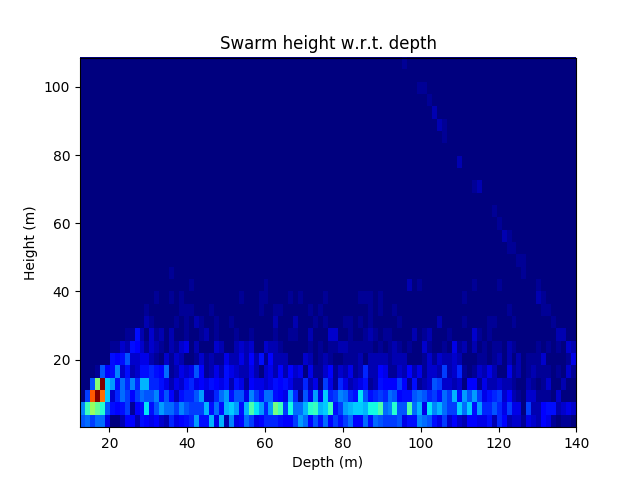

Text(0.5,1,'Swarm height w.r.t. depth')

In [18]:
D,H = [],[]
for swarm in global_swarm_list:
    if swarm['length']>0 and swarm['height']>0:
        D.append(swarm['depth'])
        H.append(swarm['height'])
plt.figure()
if len(global_swarm_list)<200:
    plt.scatter(D,H)
else:
    plt.hist2d(D, H, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Depth (m)')
plt.ylabel('Height (m)')
plt.title('Swarm height w.r.t. depth')

<IPython.core.display.Javascript object>


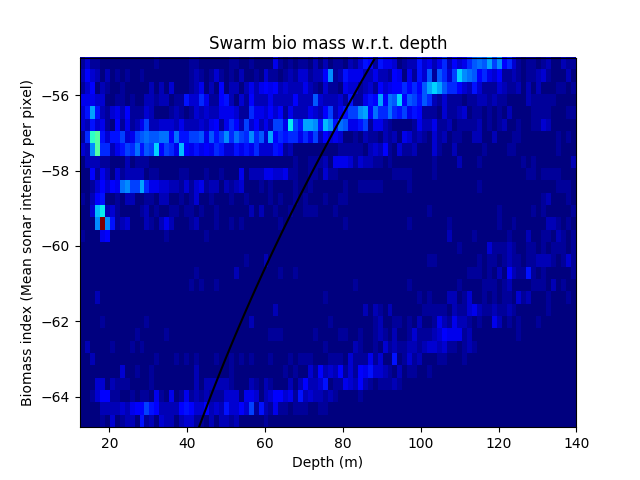

In [19]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0:# and 10*np.log10(swarm['biomass_per_pixel']/10)<0: #filter bad swarms
        if swarm['length']>0:
            D.append(swarm['depth'])
            B.append(10*np.log10(swarm['biomass_per_pixel']/10))

# Bg noise          
            
            
alpha = 0.0394177
ref_depth = 100 # 100m is 537 pixels
#data_trunc_ref = cut_echogram(data,ref_depth,depth_data)
#Sv_ref = data_trunc_ref[-1,:]
Sv_ref = -53
offset = np.mean(Sv_ref)- 20* np.log10(ref_depth)-2*alpha*ref_depth
depth_start = np.min(D)
depth_stop = np.max(D)
nb_points = 100#len(data_trunc_ref[:,0]
depth_values = np.linspace(depth_start,depth_stop,nb_points)

bg_noise = offset + 20 * np.log10(depth_values) + 2 * alpha * depth_values        
            
            
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Depth (m)')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. depth')
plt.plot(depth_values,bg_noise,'k')

<IPython.core.display.Javascript object>


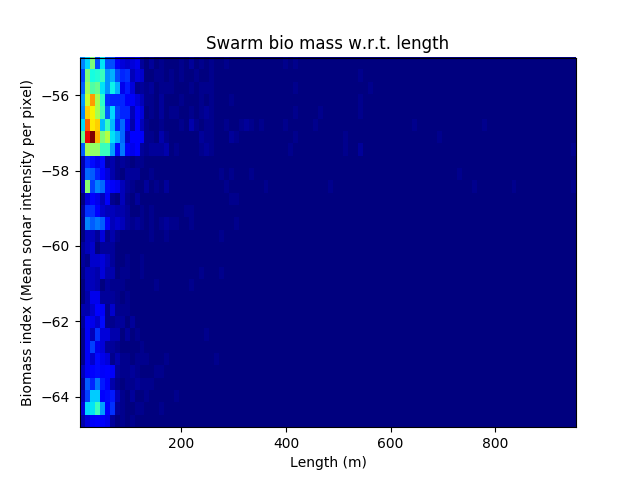

Text(0.5,1,'Swarm bio mass w.r.t. length')

In [20]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and 10*np.log10(swarm['biomass_per_pixel']/10)<0: #filter bad swarms
        if swarm['length']>0:
            D.append(swarm['length'])
            B.append(10*np.log10(swarm['biomass_per_pixel']/10))

plt.figure()
#plt.scatter(D,B)
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Length (m)')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. length')

<IPython.core.display.Javascript object>


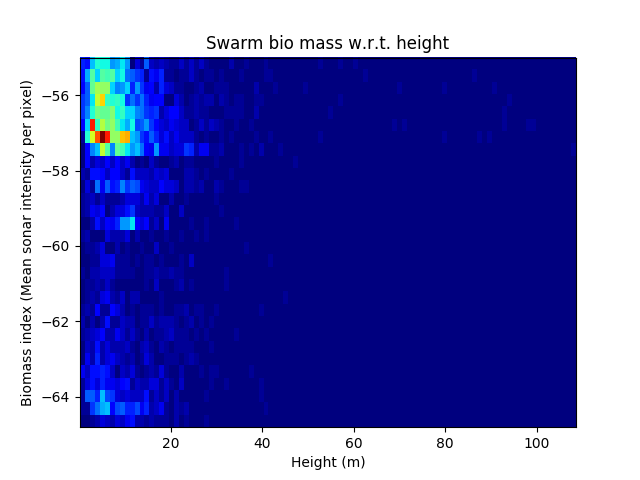

Text(0.5,1,'Swarm bio mass w.r.t. height')

In [21]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and 10*np.log10(swarm['biomass_per_pixel']/10)<0: #filter bad swarms
        if swarm['length']>0:
            D.append(swarm['height'])
            B.append(10*np.log10(swarm['biomass_per_pixel']/10))
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Height (m)')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. height')

In [22]:
import json
with open('krill_data.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(global_swarm_list, ensure_ascii=False))

In [23]:
import csv
keys = global_swarm_list[0].keys()
with open('swarms.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(global_swarm_list)

<IPython.core.display.Javascript object>


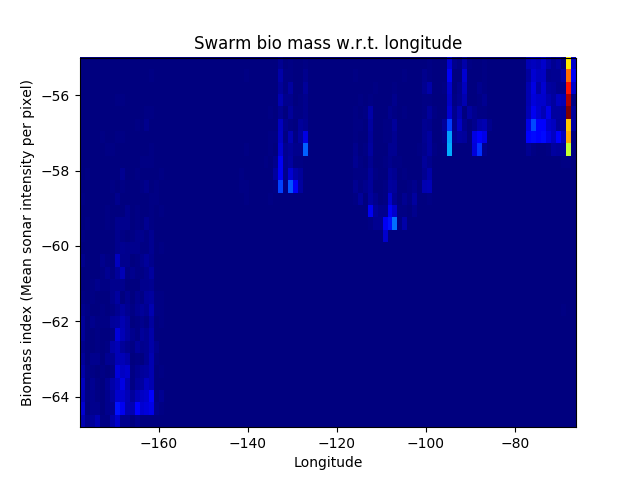

Text(0.5,1,'Swarm bio mass w.r.t. longitude')

In [24]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and 10*np.log10(swarm['biomass_per_pixel']/10)<0: #filter bad swarms
        if swarm['length']>0 and swarm['longitude']!=0:
            D.append(swarm['longitude'])
            B.append(10*np.log10(swarm['biomass_per_pixel']/10))
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. longitude')

<IPython.core.display.Javascript object>


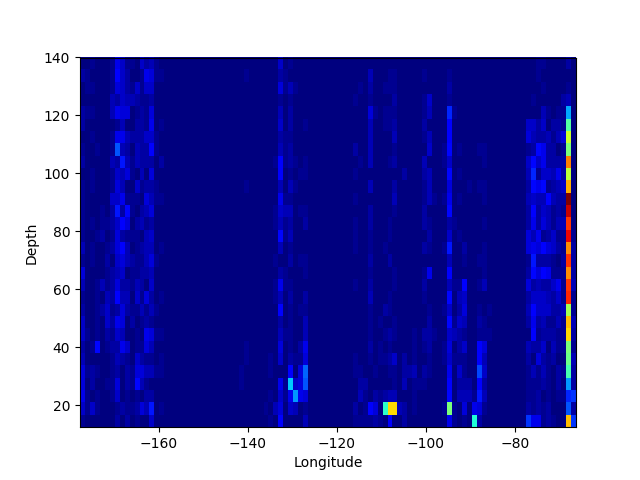

Text(0,0.5,'Depth')

In [25]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and 10*np.log10(swarm['biomass_per_pixel']/10)<0: #filter bad swarms
        if swarm['length']>0 and swarm['longitude']!=0:
            D.append(swarm['longitude'])
            B.append(swarm['depth'])
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Depth')

<IPython.core.display.Javascript object>


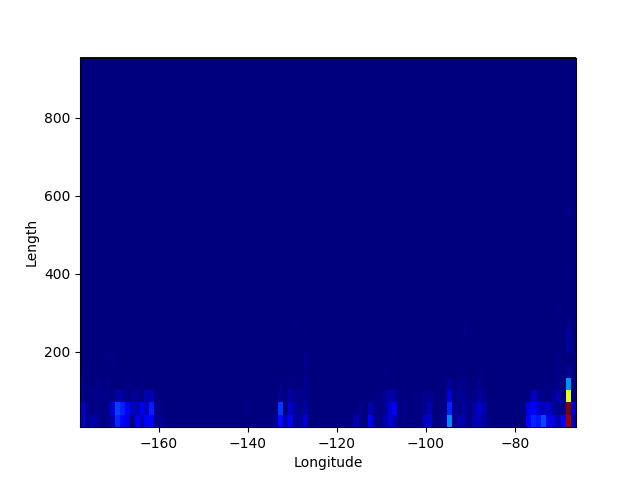

Text(0,0.5,'Length')

In [26]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and 10*np.log10(swarm['biomass_per_pixel']/10)<0: #filter bad swarms
        if swarm['length']>0 and swarm['longitude']!=0:
            D.append(swarm['longitude'])
            B.append(swarm['length'])
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Length')

<IPython.core.display.Javascript object>


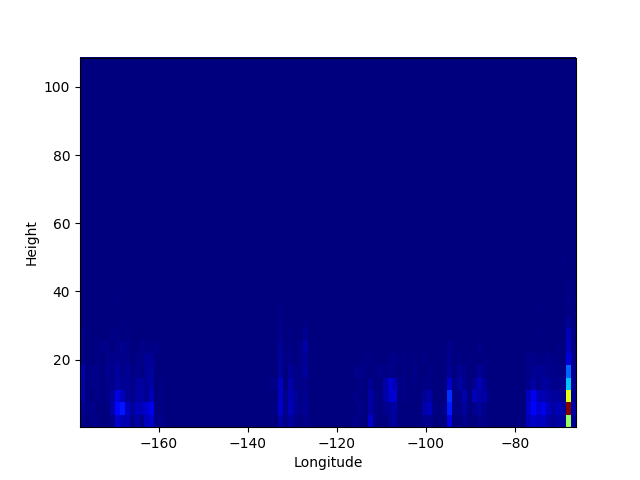

Text(0,0.5,'Height')

In [27]:
D,B = [],[]
for swarm in global_swarm_list:
        D.append(swarm['longitude'])
        B.append(swarm['height'])
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Height')

In [37]:
100*np.tan(7/360*np.pi)

6.1162620150484308

### Hour starting from sunrise

In [28]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

<IPython.core.display.Javascript object>


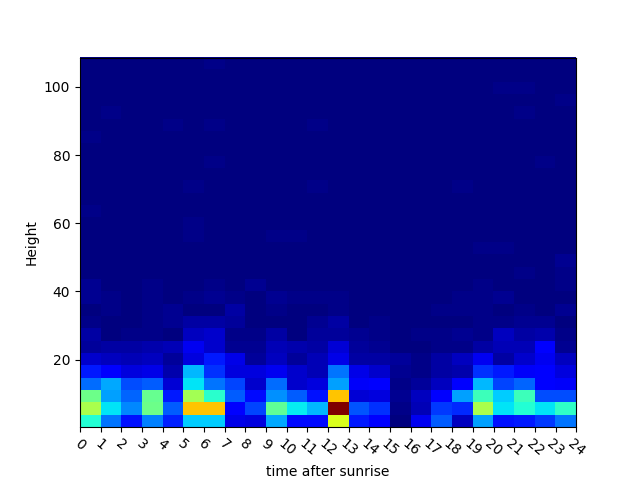

Text(0,0.5,'Height')

In [29]:
import datetime
D,B = [],[]
for swarm in global_swarm_list:
            swarm_date = ACE_box.get_date(swarm['date'],swarm['time'],'000')
            sunrise,sunset = ACE_box.suntime(swarm_date,swarm['latitude'],swarm['longitude'])
            #sunrise = datetime.datetime(swarm_date)
            time_after_sunrise = swarm_date - sunrise
            #print(time_after_sunrise)
            D.append(time_after_sunrise.seconds / 3600)
            B.append(swarm['height'])
fig,ax = plt.subplots()
if len(global_swarm_list)<400:
    plt.scatter(D,B,alpha=0.3)
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(24, 30), cmap=plt.cm.jet)
plt.xticks(rotation=-40)
ax.xaxis.set_major_locator(plt.MaxNLocator(24))
#ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
plt.xlabel('time after sunrise')
plt.ylabel('Height')

### UTC hour

<IPython.core.display.Javascript object>


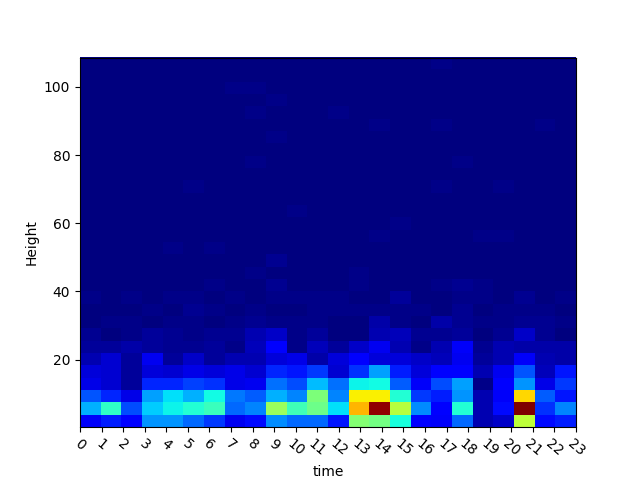

Text(0,0.5,'Height')

In [30]:
D,B = [],[]
for swarm in global_swarm_list:
            D.append(int(swarm['time'][0:2]))
            B.append(swarm['height'])
fig,ax = plt.subplots()
if len(global_swarm_list)<400:
    plt.scatter(D,B,alpha=0.3)
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(24, 30), cmap=plt.cm.jet)
plt.xticks(rotation=-40)
ax.xaxis.set_major_locator(plt.MaxNLocator(24))
#ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
plt.xlabel('time')
plt.ylabel('Height')

<IPython.core.display.Javascript object>


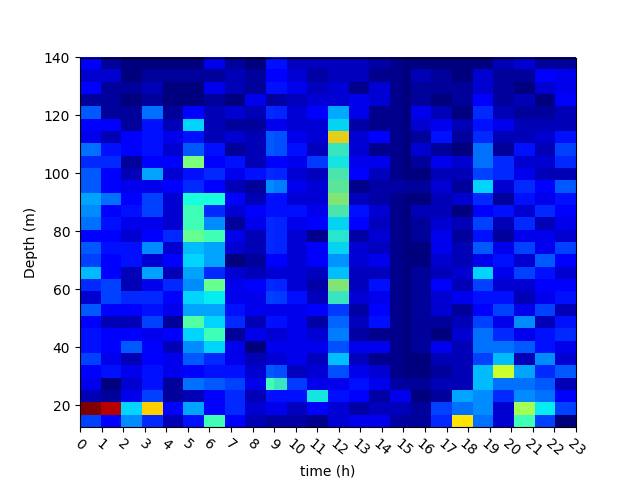

In [31]:
D,B = [],[]
for swarm in global_swarm_list:
    swarm_date = ACE_box.get_date(swarm['date'],swarm['time'],'000')
    sunrise,sunset = ACE_box.suntime(swarm_date,swarm['latitude'],swarm['longitude'])
    #sunrise = datetime.datetime(swarm_date)
    
    time_after_sunrise = swarm_date - sunrise
    #print(swarm_date,sunrise,time_after_sunrise)
    #print(time_after_sunrise.days)
    #if time_after_sunrise.days==0:
    #    D.append(int(time_after_sunrise.seconds / 3600))
    #else:
    #    D.append(int(time_after_sunrise.seconds / 3600) - 24)
    D.append(int(time_after_sunrise.seconds / 3600))
    B.append(swarm['depth'])
fig,ax = plt.subplots()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(24, 30), cmap=plt.cm.jet)
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('time (h)')
plt.ylabel('Depth (m)')
plt.axvspan(9, 15, facecolor='b', alpha=0.1)

In [32]:
hour_dic = {}
for h,value in zip(D,B):
    if not h in hour_dic.keys():
        hour_dic[h] = [value]
    else:
        hour_dic[h].append(value)
    

In [33]:
hour_sec = []
position = []
for key in hour_dic:
    position.append(key)
    hour_sec.append(hour_dic[key])

<IPython.core.display.Javascript object>


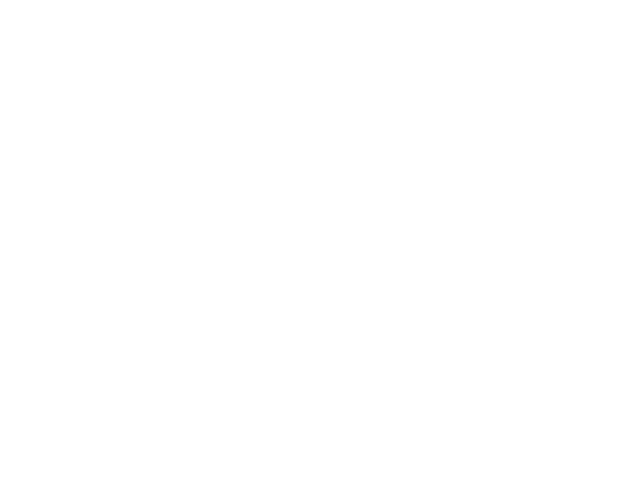

KeyboardInterrupt: 

In [105]:
plt.figure()
xx = plt.boxplot(hour_sec,positions= position)

In [34]:
mean_value = []
mean_value_time = []
for key in hour_dic:
    mean_value_time.append(key)
    mean_value.append(np.mean(hour_dic[key]))

In [35]:
nb_krill = []
mean_value_time = []
for key in hour_dic:
    mean_value_time.append(key)
    nb_krill.append(len(hour_dic[key]))

In [36]:
std_value = []
std_value_time = []
for key in hour_dic:
    std_value_time.append(key)
    std_value.append(np.std(hour_dic[key]))

<IPython.core.display.Javascript object>


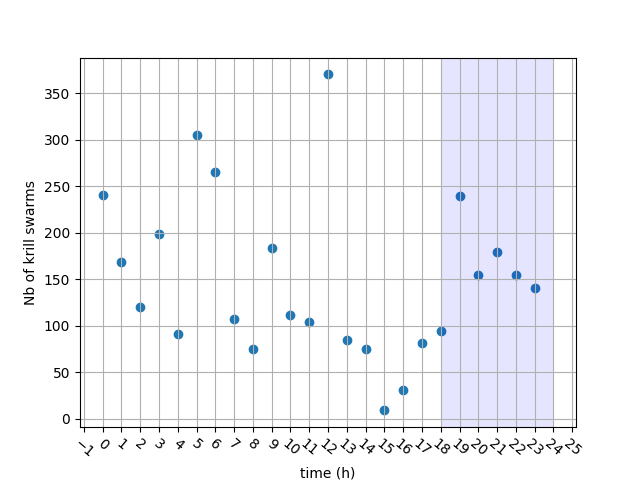

In [37]:
fig,ax = plt.subplots()
plt.scatter(mean_value_time,nb_krill)
plt.grid()
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('time (h)')
plt.ylabel('Nb of krill swarms')
#plt.axvspan(9, 15, facecolor='b', alpha=0.1)
plt.axvspan(18, 24, facecolor='b', alpha=0.1)


<IPython.core.display.Javascript object>


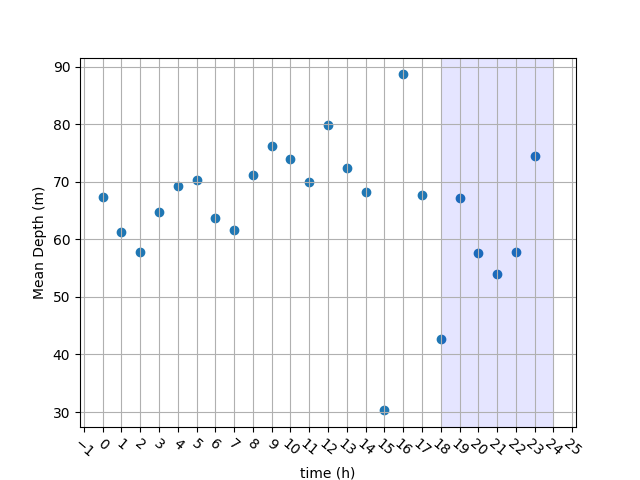

In [38]:
fig,ax = plt.subplots()
plt.scatter(mean_value_time,mean_value)
plt.grid()
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('time (h)')
plt.ylabel('Mean Depth (m)')
#plt.axvspan(-16, 0, facecolor='b', alpha=0.1)
plt.axvspan(18, 24, facecolor='b', alpha=0.1)


<IPython.core.display.Javascript object>


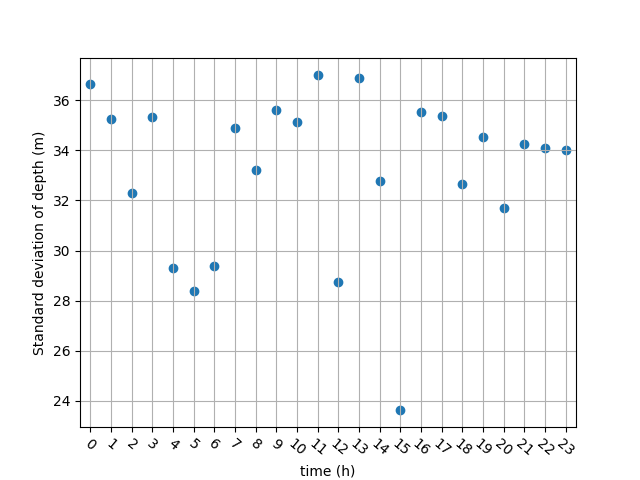

Text(0,0.5,'Standard deviation of depth (m)')

In [39]:
fig,ax = plt.subplots()
plt.scatter(std_value_time,std_value)
plt.grid()
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlim(-0.5,23.5)
plt.xlabel('time (h)')
plt.ylabel('Standard deviation of depth (m)')

<IPython.core.display.Javascript object>


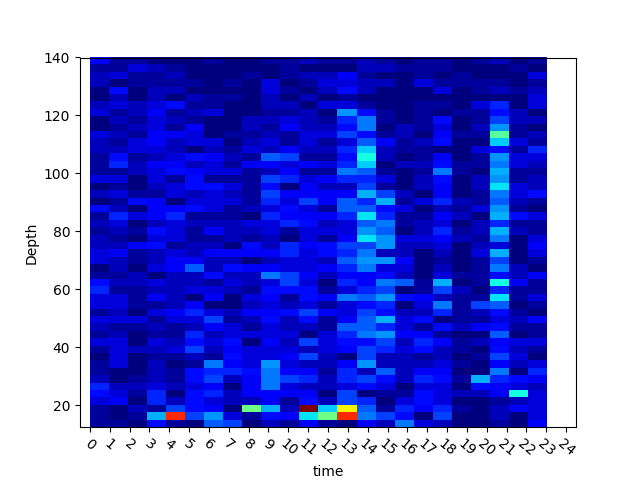

Text(0,0.5,'Depth')

In [40]:
D,B = [],[]
for swarm in global_swarm_list:
            D.append(int(swarm['time'][0:2]))
            B.append(swarm['depth'])
fig,ax = plt.subplots()
if len(global_swarm_list)<200:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(24, 50), cmap=plt.cm.jet)
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlim(-0.5,24.5)
plt.xlabel('time')
plt.ylabel('Depth')

<IPython.core.display.Javascript object>


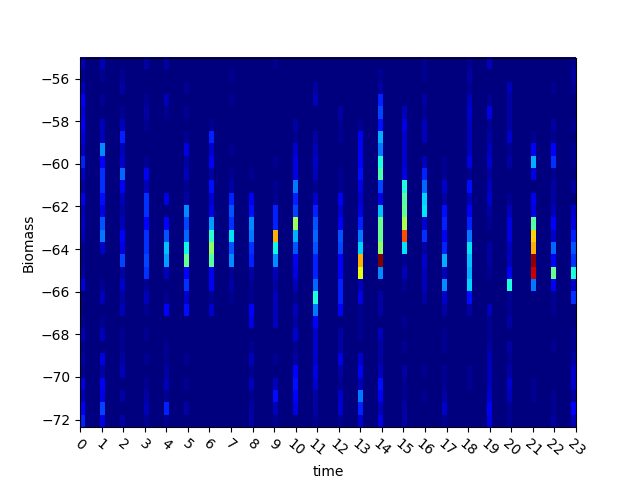

Text(0,0.5,'Biomass')

In [41]:
D,B = [],[]
for swarm in global_swarm_list:
            D.append(int(swarm['time'][0:2]))
            B.append(10*np.log10(swarm['biomass_per_pixel']/10))
fig,ax = plt.subplots()
if len(global_swarm_list)<200:
    plt.scatter(D,B,alpha=0.3)
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xticks(rotation=-40)
ax.xaxis.set_major_locator(plt.MaxNLocator(24))
#ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
plt.xlabel('time')
plt.ylabel('Biomass')